# **Exploratory Data Analysis of Warsaw Rental Prices**

## **Table of contents:**
1. [Basic info about dataset](#p0)
    1. [Introduction](#s1)
    2. [Loading packages, setting plotting parameters and reading data](#s2)
2. [Univariate anaysis](#p1)
    1. [Analysis of numeric variables](#s3)
    2. [Analysis of categorical variables](#s4)
3. [Bivariate analysis](#p2)
    1. [Price vs. nominal variables](#s5)
    2. [Price vs. ordinal variables](#s6)
    3. [Area vs. ordinal variables](#s7)
    4. [Price vs. Area](#s7)
4. [Results](#p3)

## **Basic info about dataset** <a name="p0"></a>

### **Introduction** <a name="s0"></a>

**Featured below is a simple exploratory data analysis of rental prices in Warsaw.**

**The goal of this analysis is to get a look at how the data is distributed and look for a relationship between price and other features.**

**The results are going to be used in feature engineering to prepare this dataset for regression**

### **Loading packages, setting plotting parameters and reading data**  <a name="s1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import mode
from scipy.stats import median_absolute_deviation as mad
from scipy.stats import median_test  
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams.update({
    "xtick.major.size": 5,
    "xtick.major.pad": 20,
    "xtick.labelsize": 20,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 5,
    "lines.linewidth": 2,
    "lines.color": "g",
    "figure.figsize": (10, 5),
    'axes.titlesize': 25,
    'axes.titlepad' : 20,
    'figure.autolayout': True,
})
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('warsaw_rent.csv')

In [4]:
pd.options.display.max_columns = None
df.head()

,Price,Type of building,Floor,Rooms,Area,Advertiser,Heating,Windows,Elevator,Parking space,Building material,District,Washing machine,Dishwasher,Oven,Stove,TV,Refrigerator,Cable TV,Internet,Balcony,Terrace,Garden
0,2400.0,Block of flats,4.0,1,27.0,Private,Urban,Plastic,True,False,Brick,Śródmieście,True,False,True,True,False,True,False,False,True,False,False
1,4500.0,Apartment building,1.0,3,68.0,Private,Urban,Wood,True,True,NaN,Wilanów,True,True,True,True,True,True,True,True,False,True,False
2,3000.0,Block of flats,1.0,2,50.4,Private,Urban,Plastic,False,False,Other,Białołęka,True,True,True,True,True,True,True,True,True,False,False
3,2000.0,Block of flats,1.0,1,18.0,Private,Urban,NaN,False,False,NaN,Ochota,True,False,False,True,False,True,False,False,False,False,False
4,2500.0,Block of flats,2.0,2,38.0,Private,Urban,Plastic,False,False,Great plate,Mokotów,True,False,True,True,False,True,False,False,True,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              2212 non-null   float64
 1   Type of building   2036 non-null   object 
 2   Floor              2191 non-null   float64
 3   Rooms              2213 non-null   int64  
 4   Area               2213 non-null   float64
 5   Advertiser         2213 non-null   object 
 6   Heating            1773 non-null   object 
 7   Windows            1503 non-null   object 
 8   Elevator           2213 non-null   bool   
 9   Parking space      2213 non-null   bool   
 10  Building material  1277 non-null   object 
 11  District           2213 non-null   object 
 12  Washing machine    2213 non-null   bool   
 13  Dishwasher         2213 non-null   bool   
 14  Oven               2213 non-null   bool   
 15  Stove              2213 non-null   bool   
 16  TV                 2213 

**Almost all of the features are categorical with exception to the area.**


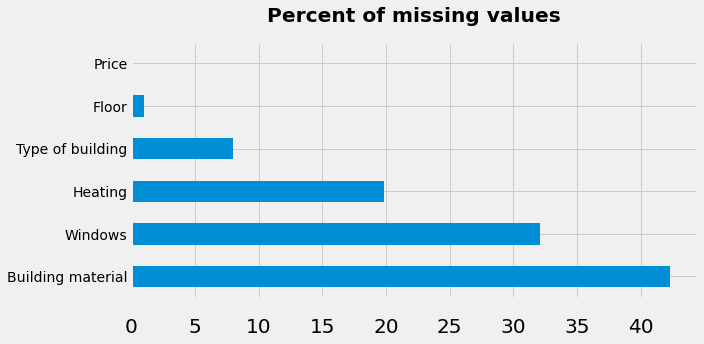

In [6]:
missing = (
    df[df.columns[df.isnull().any()]]
    .isnull()
    .sum()
    .div(df.shape[0])
    .multiply(100)
    .sort_values(ascending = False)
)

missing.plot(kind='barh').set_title('Percent of missing values',fontweight = 'bold')
plt.show()

**A lot of missing values in Heating, Windnows and Building material columns**


## **Univariate analysis** <a name="p1"></a>

### **Analysis of numeric variables** <a name="s2"></a>

**What shape do numerical variables have?**

In [7]:
# Function summarizing values in column 
def describe(col):
    col = df[col]
    print(col.describe())
    print("var\t", np.var(col))
    print("skew\t",skew(col,nan_policy = 'omit'))
    print("kurt\t",kurtosis(col,nan_policy = 'omit'))
    print("mode\t",mode(col))
    print("mad\t",mad(col,nan_policy = 'omit'))
    print("range\t",np.max(col) - np.min(col))

In [8]:
# Function calculating optimal number of bins based on Scott's rule
def get_bins(col):
    R = np.max(col) - np.min(col)
    n = len(col)
    sigma = col.std()
    return int(R*(n**(1/3))/(3.49 * sigma))


# Function ploting distribution of given variable
def plots(col):
    col = df[col]
    
    #Histogram
    col.hist(bins = get_bins(col))
    plt.title(f'{col.name} Histogram')
    plt.xlabel(col.name) 
    plt.ylabel('Frequency') 
    plt.show()
    
    #Box plot
    col.plot(kind = 'box')
    plt.title(f'{col.name} Box plot')
    plt.show()
    
    #KDE plot
    sns.distplot(col, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 3})
    plt.title(f'{col.name} KDE plot')
    plt.xlabel(col.name)
    plt.ylabel('Density') 
    plt.show()

In [9]:
describe('Area')

count    2213.000000
mean       61.190239
std        35.704946
min         9.000000
25%        40.000000
50%        50.380000
75%        70.000000
max       362.000000
Name: Area, dtype: float64
var	 1274.2671250669089
skew	 2.5635591694186806
kurt	 10.36340282599165
mode	 ModeResult(mode=array([50.]), count=array([91]))
mad	 20.193011999999996
range	 353.0


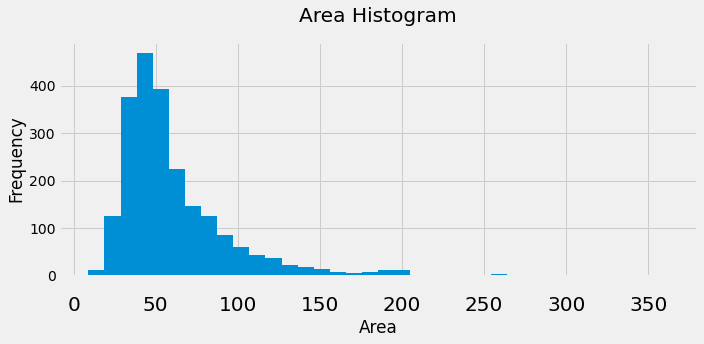

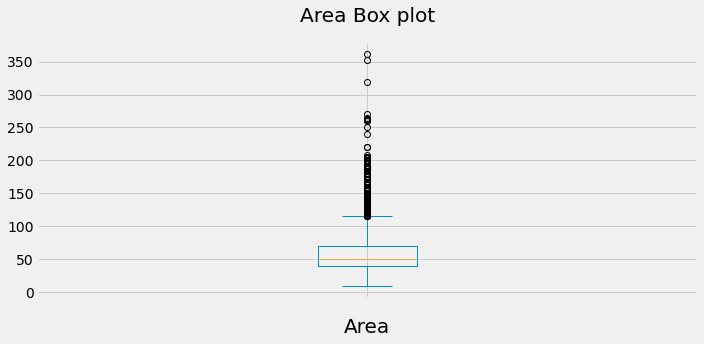

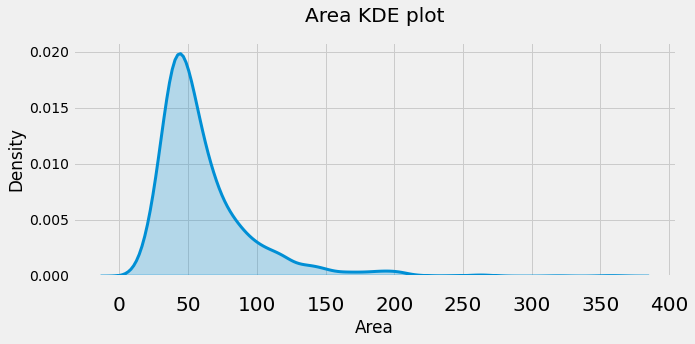

In [10]:
plots('Area')

In [11]:
df.iloc[df['Area'].idxmin()]

Price                            1000.0
Type of building     Apartment building
Floor                               1.0
Rooms                                 3
Area                                9.0
Advertiser                      Private
Heating                             NaN
Windows                             NaN
Elevator                           True
Parking space                     False
Building material                 Brick
District                   Praga-północ
Washing machine                    True
Dishwasher                         True
Oven                               True
Stove                              True
TV                                False
Refrigerator                       True
Cable TV                          False
Internet                           True
Balcony                           False
Terrace                           False
Garden                            False
Name: 722, dtype: object

In [12]:
df.iloc[df['Area'].idxmax()]

Price                           20000.0
Type of building     Apartment building
Floor                               6.0
Rooms                                 6
Area                              362.0
Advertiser                Estate agency
Heating                             NaN
Windows                             NaN
Elevator                           True
Parking space                      True
Building material                 Brick
District                       Żoliborz
Washing machine                   False
Dishwasher                        False
Oven                              False
Stove                             False
TV                                False
Refrigerator                      False
Cable TV                          False
Internet                          False
Balcony                           False
Terrace                           False
Garden                            False
Name: 1552, dtype: object

In [13]:
describe('Price')

count     2212.000000
mean      4597.167269
std       3477.917755
min       1000.000000
25%       2700.000000
50%       3500.000000
75%       5000.000000
max      48000.000000
Name: Price, dtype: float64
var	 12090443.59860307
skew	 3.5834637288399662
kurt	 20.759223329399372
mode	 ModeResult(mode=array([3000.]), count=array([168]))
mad	 1408.47
range	 47000.0


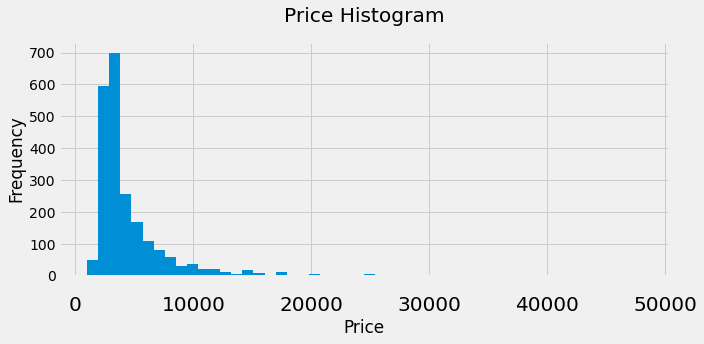

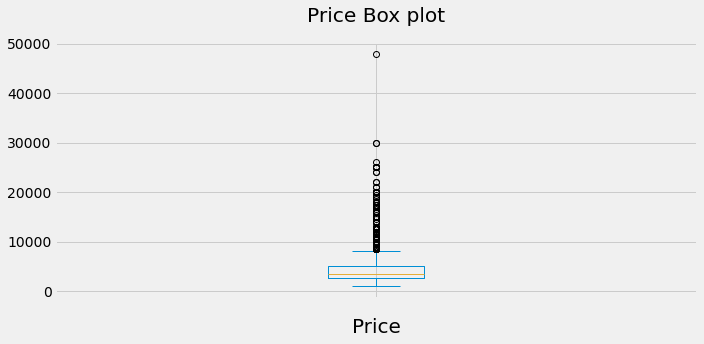

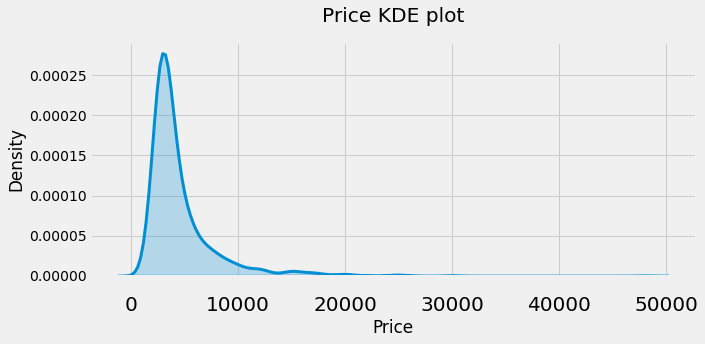

In [14]:
plots('Price')

In [15]:
df.iloc[df['Price'].idxmin()]

Price                            1000.0
Type of building     Apartment building
Floor                               1.0
Rooms                                 3
Area                                9.0
Advertiser                      Private
Heating                             NaN
Windows                             NaN
Elevator                           True
Parking space                     False
Building material                 Brick
District                   Praga-północ
Washing machine                    True
Dishwasher                         True
Oven                               True
Stove                              True
TV                                False
Refrigerator                       True
Cable TV                          False
Internet                           True
Balcony                           False
Terrace                           False
Garden                            False
Name: 722, dtype: object

In [16]:
df.iloc[df['Price'].idxmax()]

Price                       48000.0
Type of building     Block of flats
Floor                           NaN
Rooms                             4
Area                          204.0
Advertiser            Estate agency
Heating                       Urban
Windows                    Aluminum
Elevator                       True
Parking space                  True
Building material             Other
District                Śródmieście
Washing machine               False
Dishwasher                    False
Oven                          False
Stove                         False
TV                            False
Refrigerator                  False
Cable TV                       True
Internet                       True
Balcony                       False
Terrace                       False
Garden                        False
Name: 167, dtype: object

**Both Price and Area consists of heavily skew data with tall tail and contain a lot of outliers. Most values of Area are located around 50 while most common prices are 3000-3500.**


### **Analysis of categorical variables** <a name="s4"></a>

**How frequent are offers in each category?**

In [17]:
# Function plotting number of offers in given category
def offers_plot(col,kind,rot):
    df[col].value_counts().plot(kind = kind).xaxis.set_tick_params(rotation=rot)
    plt.title(f'Offers per {col}',fontweight = 'bold')
    if kind == 'barh':
        plt.xlabel('Offers')
    else:
        plt.ylabel('Offers')
    plt.show() 

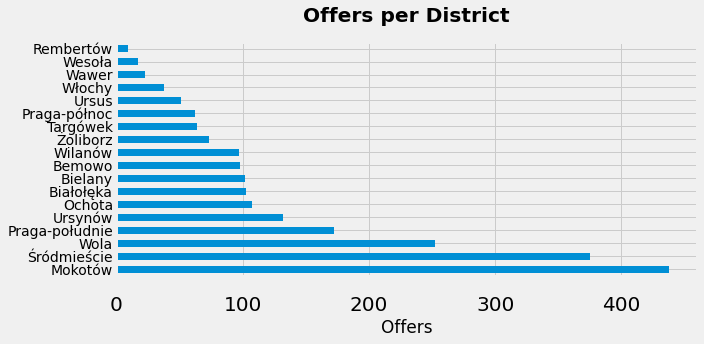

In [18]:
offers_plot('District','barh',0)

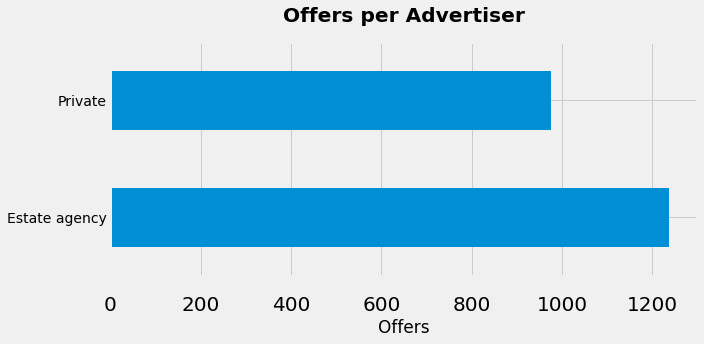

In [19]:
offers_plot('Advertiser','barh',0)

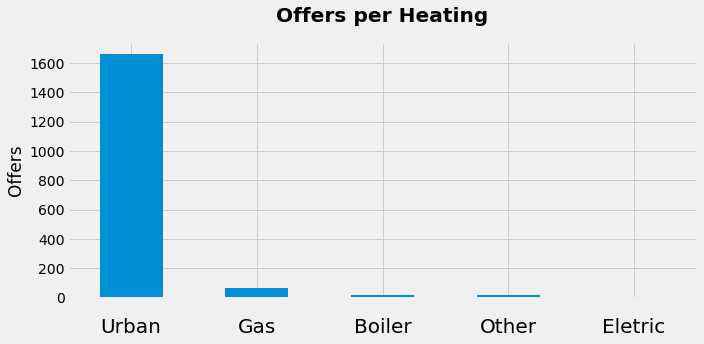

In [20]:
offers_plot('Heating','bar',0)

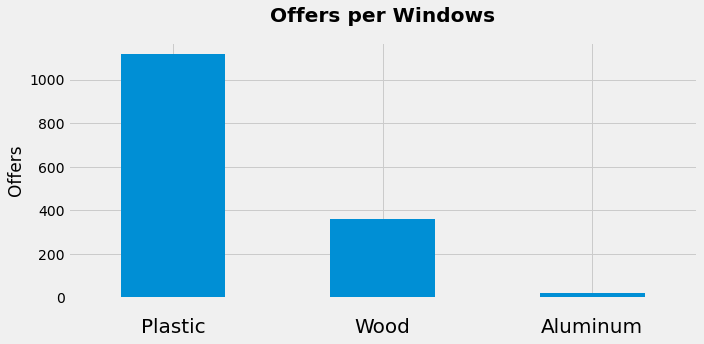

In [21]:
offers_plot('Windows','bar',0)

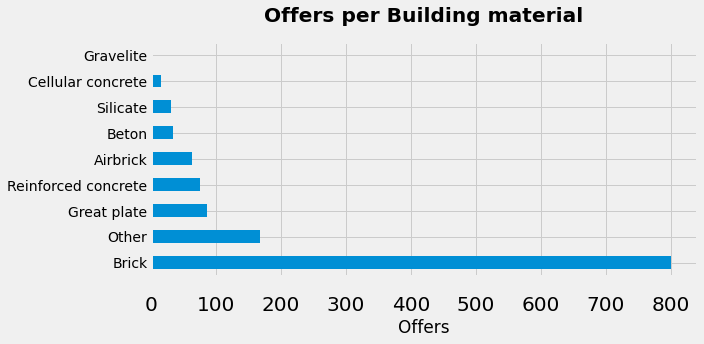

In [22]:
offers_plot('Building material','barh',0)

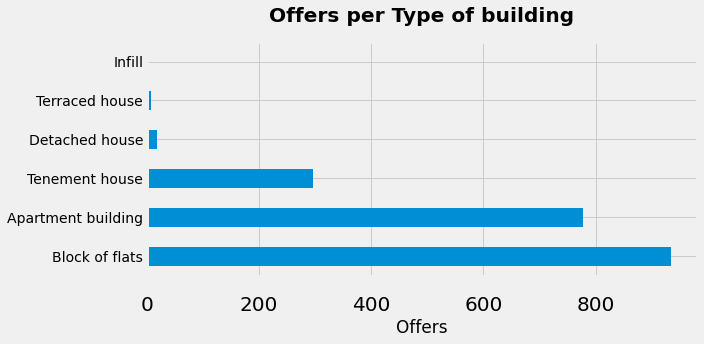

In [23]:
offers_plot('Type of building','barh',0)

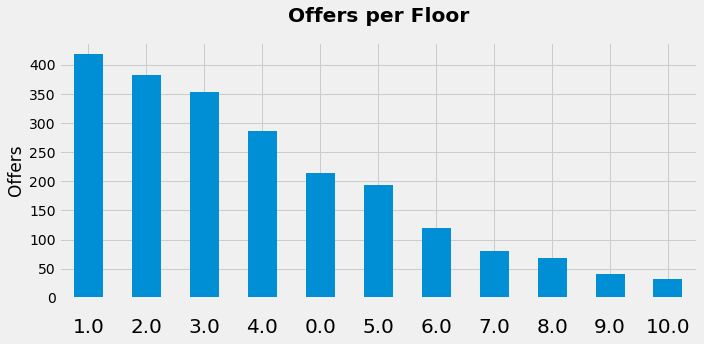

In [24]:
offers_plot('Floor','bar',0)

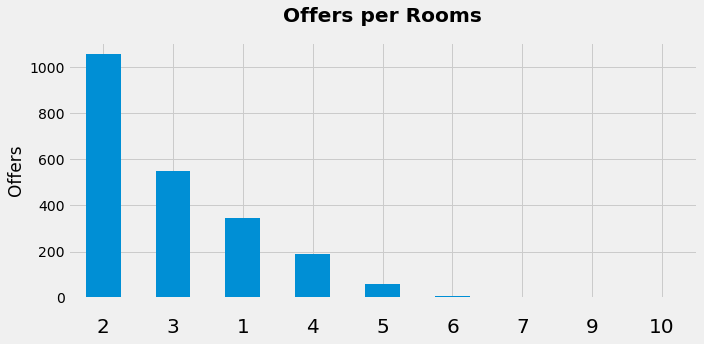

In [25]:
offers_plot('Rooms','bar',0)

In [26]:
df.iloc[df['Rooms'].idxmin()]

Price                        2400.0
Type of building     Block of flats
Floor                           4.0
Rooms                             1
Area                           27.0
Advertiser                  Private
Heating                       Urban
Windows                     Plastic
Elevator                       True
Parking space                 False
Building material             Brick
District                Śródmieście
Washing machine                True
Dishwasher                    False
Oven                           True
Stove                          True
TV                            False
Refrigerator                   True
Cable TV                      False
Internet                      False
Balcony                        True
Terrace                       False
Garden                        False
Name: 0, dtype: object

In [27]:
df.iloc[df['Rooms'].idxmax()]

Price                           24000.0
Type of building     Apartment building
Floor                               6.0
Rooms                                10
Area                              200.0
Advertiser                Estate agency
Heating                           Urban
Windows                             NaN
Elevator                           True
Parking space                      True
Building material                   NaN
District                           Wola
Washing machine                    True
Dishwasher                         True
Oven                               True
Stove                              True
TV                                 True
Refrigerator                       True
Cable TV                           True
Internet                           True
Balcony                            True
Terrace                            True
Garden                            False
Name: 2186, dtype: object

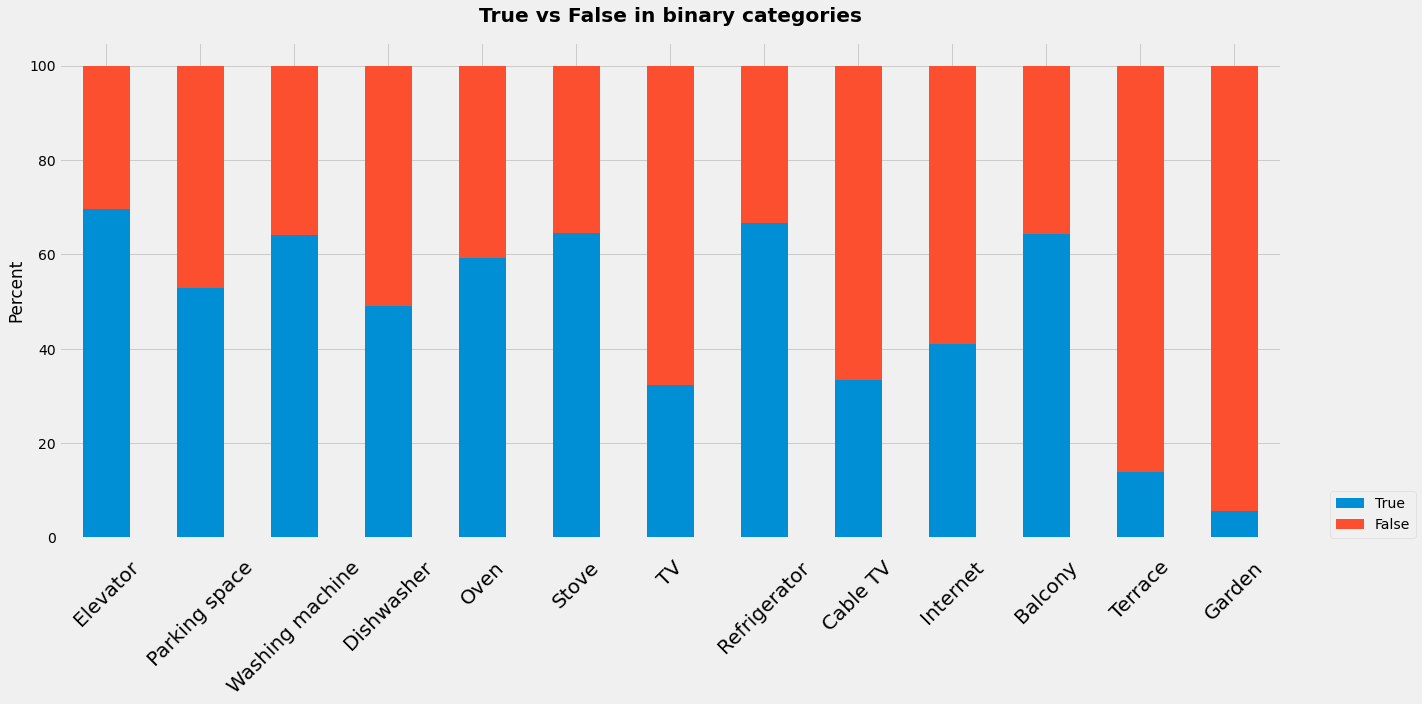

In [28]:
bc = (df.select_dtypes([bool])
      .apply(pd.Series.value_counts,normalize=True)
      .T
      .multiply(100)
      .iloc[:, ::-1])
    
bc.plot(kind = 'bar',stacked = True,figsize = (20,10)).xaxis.set_tick_params(rotation=45)
plt.title('True vs False in binary categories',fontweight = 'bold')
plt.ylabel('Percent')
plt.legend(loc=(1.04,0))
plt.show()

**There are a lot of the rare categories in the dataset, also worth mention is that min and max values of Area are not corresponding min and max number of rooms**

## **Bivariete Analysis** <a name="p2"></a>

**What relations does target variable have with other variables?**

### **Price vs. nominal variables** <a name="s5"></a>

**How does price differ in each category?**

In [29]:
# Function plotting median and scattering of price in given column
def median_plot(col,kind,sort,rot):
    group = df.groupby(col)['Price'].median()
    if sort:
        group = group.sort_values(ascending=False)    
    group.plot(kind = kind).xaxis.set_tick_params(rotation=rot)
    plt.title(f'Median price per {col}',fontweight = 'bold')
    if kind == 'barh':
        plt.xlabel('Price')
        colx = 'Price'
        coly = col
        order = group[::-1].index
    else:
        plt.ylabel('Price')
        colx = col
        coly = 'Price'
        order = group.index
    plt.show() 
    sns.stripplot(x=colx, y=coly, data=df,order = order)
    plt.title(f'Price per {col}',fontweight = 'bold')
    plt.show()

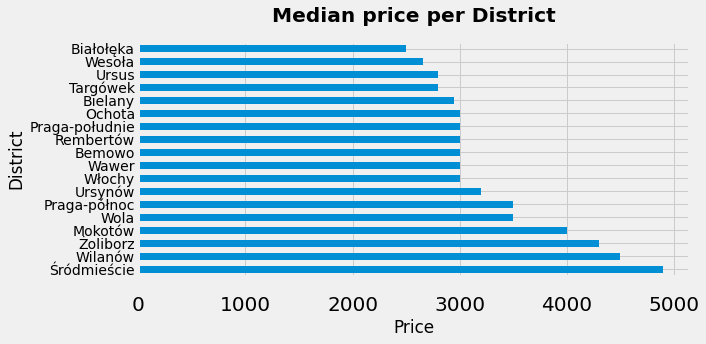

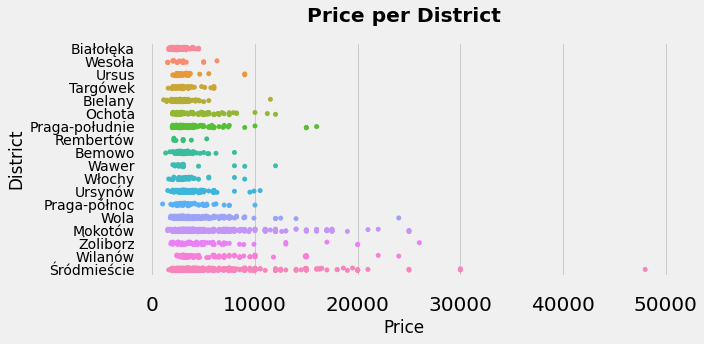

In [30]:
median_plot('District','barh',True,0)

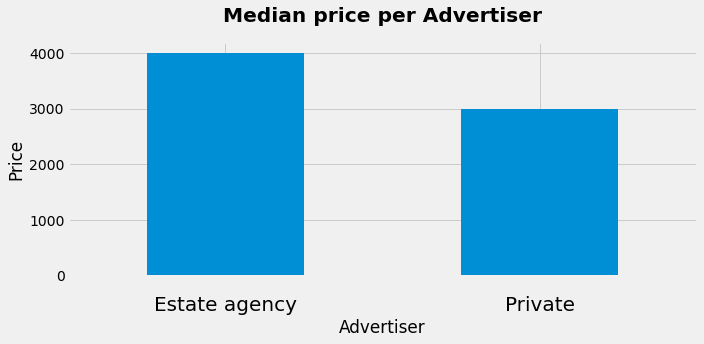

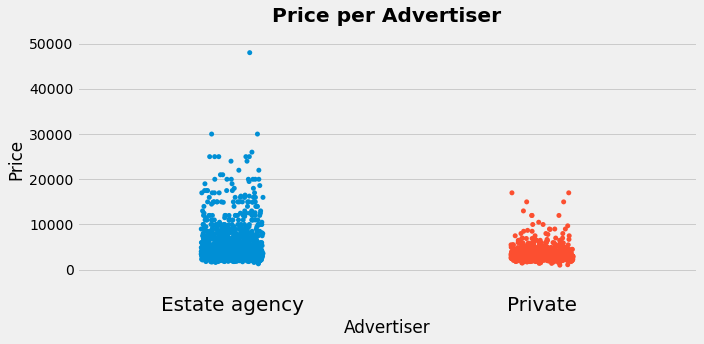

In [31]:
median_plot('Advertiser','bar',True,0)

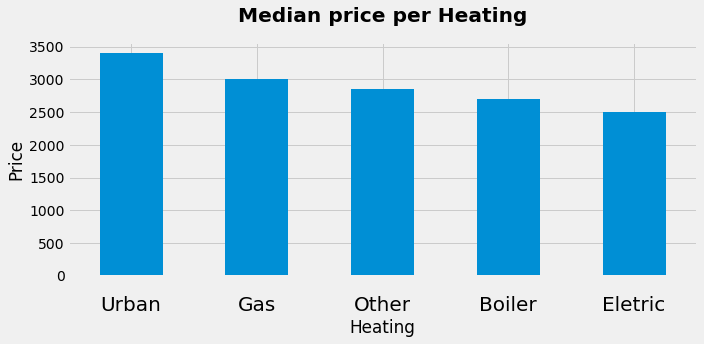

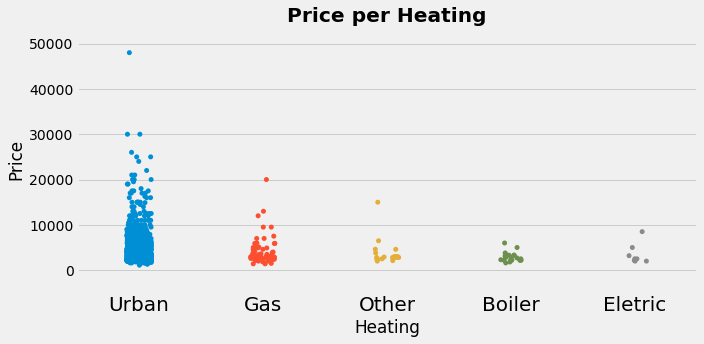

In [32]:
median_plot('Heating','bar',True,0)

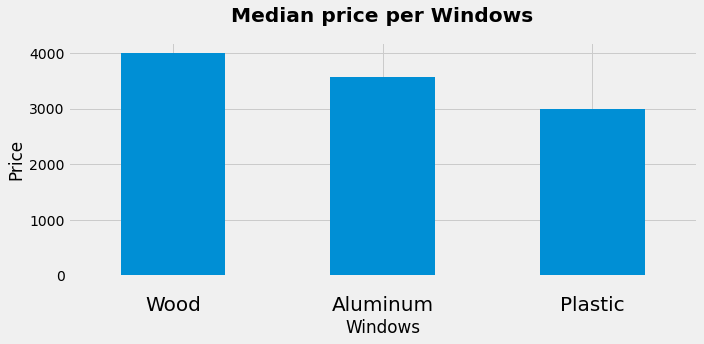

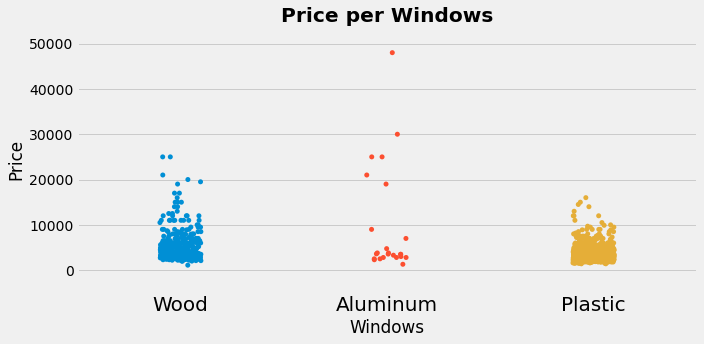

In [33]:
median_plot('Windows','bar',True,0)

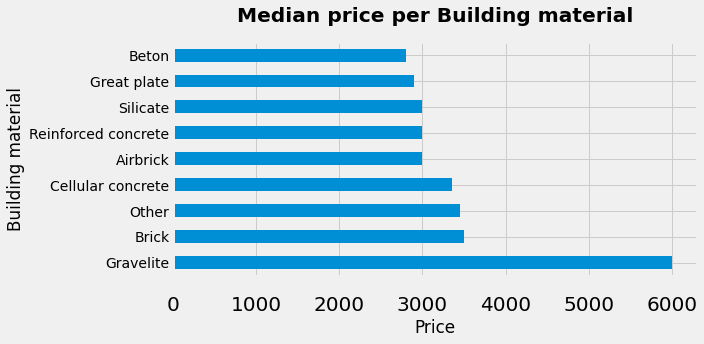

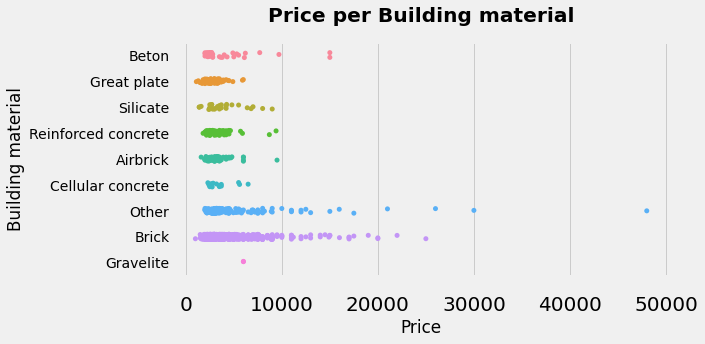

In [34]:
median_plot('Building material','barh',True,0)

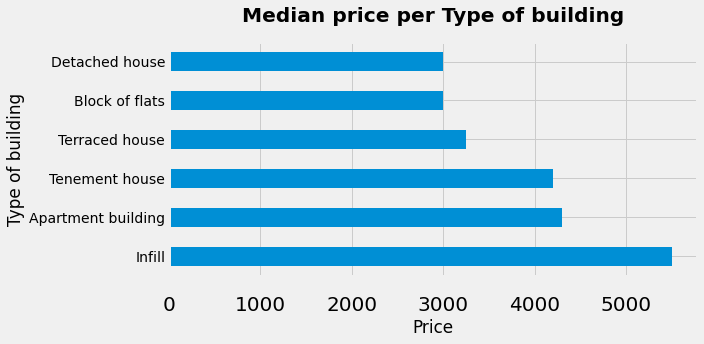

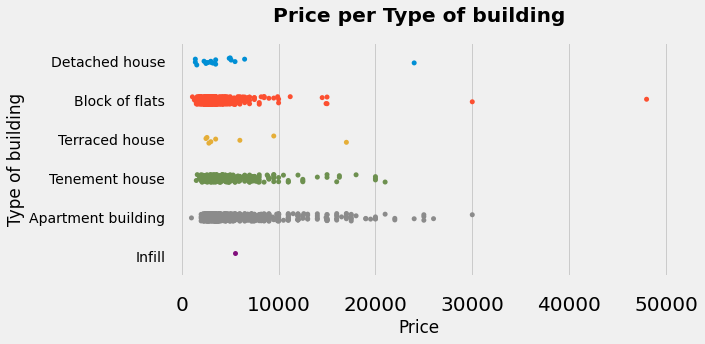

In [35]:
median_plot('Type of building','barh',True,0)

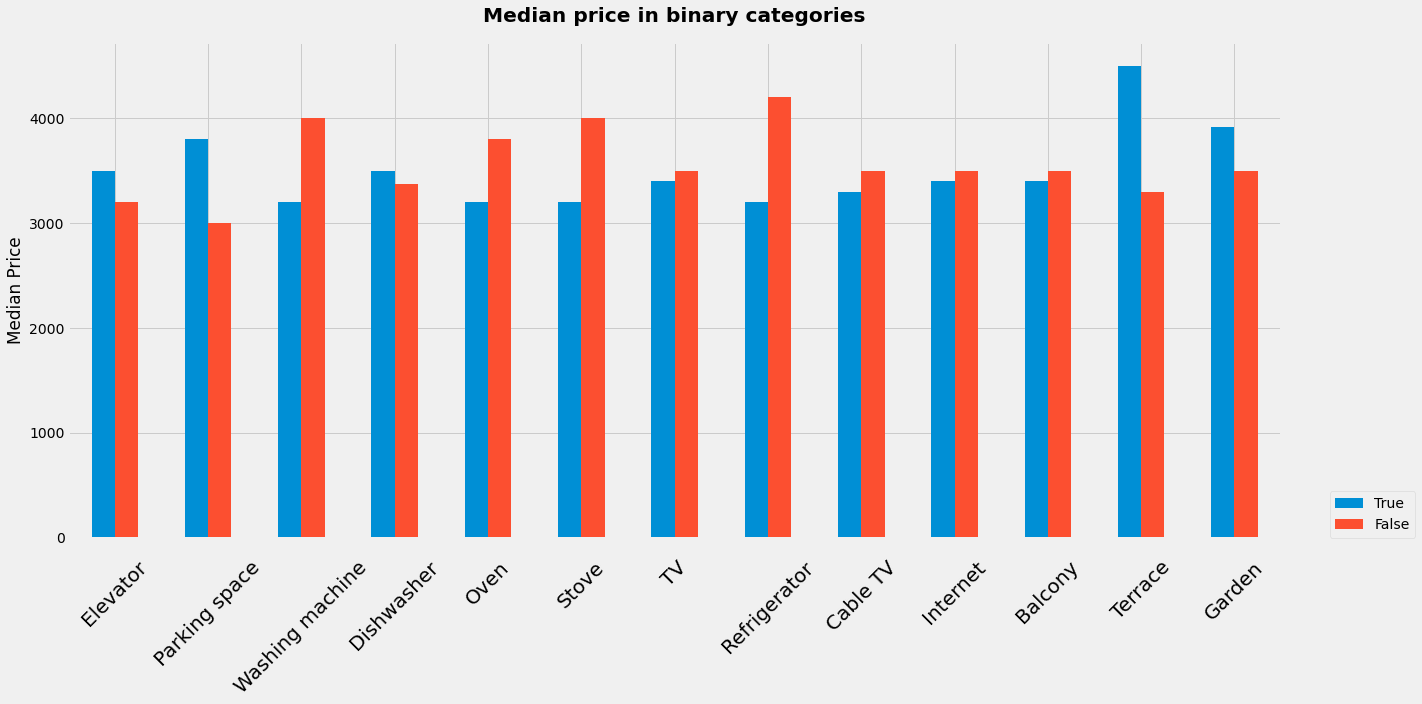

In [36]:
median_bool = []
for col in df.select_dtypes([bool]):
    median_bool.append(df.groupby(col)['Price'].median())
median_bool = pd.DataFrame(median_bool)
median_bool.index = df.select_dtypes([bool]).columns
median_bool.iloc[:, ::-1].plot(kind = 'bar',figsize = (20,10)).xaxis.set_tick_params(rotation=45)
plt.title('Median price in binary categories',fontweight = 'bold',pad = 20)
plt.ylabel('Median Price')
plt.legend(loc=(1.04,0))
plt.show()

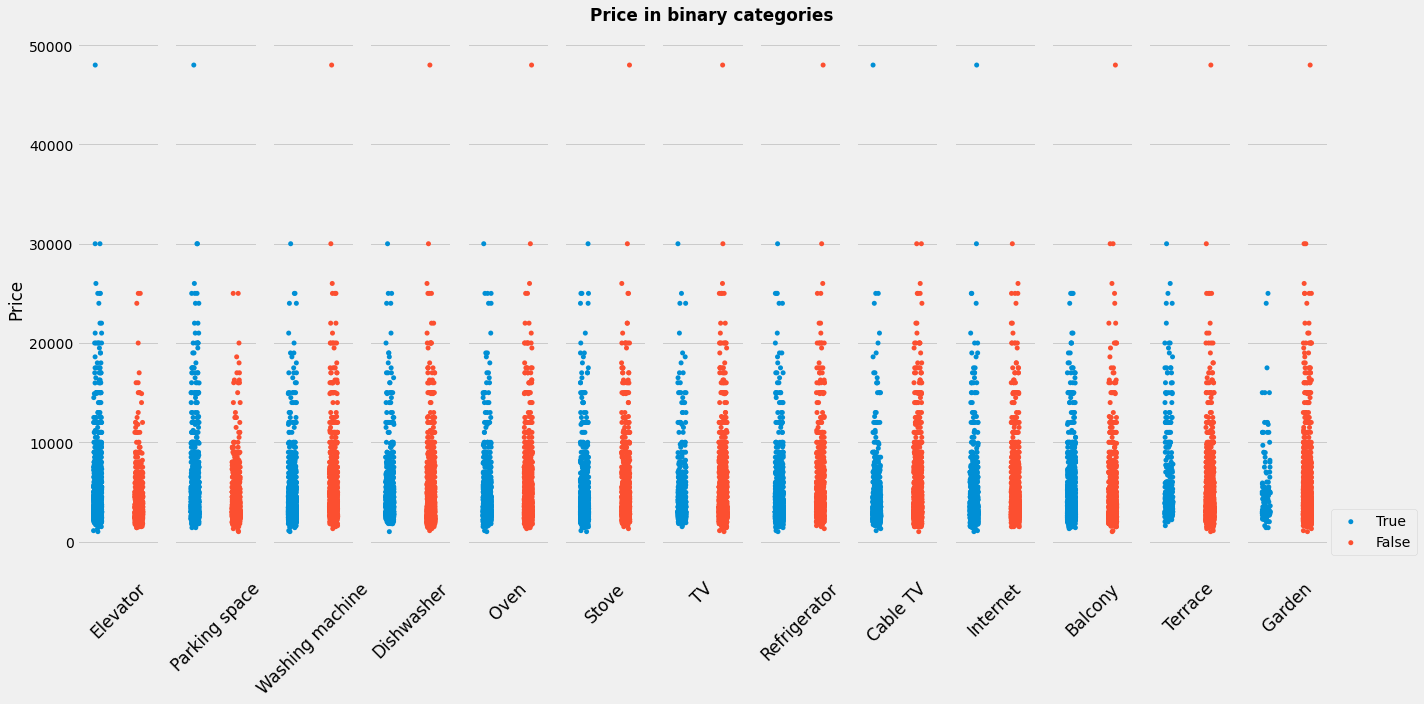

In [37]:
colx = df.select_dtypes([bool]).columns
fig, ax = plt.subplots(ncols = 13,figsize = (20,10),sharey=True)
for i in range(0,len(colx)):
    #Using ordering from the previous chart
    sns.stripplot(x=colx[i], y='Price', data=df,ax = ax[i],order = median_bool.iloc[:, ::-1]).set(ylabel=None,xlabel = None,xticklabels=[])
    ax[i].set_xlabel(colx[i], rotation=45)

ax[0].set_ylabel('Price')
ax[12].legend(['True','False'],loc=(1.04,0))
fig.suptitle('Price in binary categories',fontweight = 'bold')
plt.show()

**Is there any difference in price within the categories?** 


***Mood's Median Test*** **- a non-parametric, more robust than Kruskal-Wallis test will help determine whether one median is different in given category.** 

***H - There is no difference between samples median.*** 

***Ha - At least one of the samples has different median.*** 

**Categories in which H is rejected will be printed in blue, while those with *p-value* too large for rejection in red** 

In [38]:
# Function performing Mood's Median Test
def moods_test(col):
    lst =  [df['Price'][col == a].values for a in  col.unique()]
    g, p, med, tbl = median_test(*lst,nan_policy='omit')
    return p

In [39]:
for col in df.select_dtypes([object,bool]):
    try:
        p = moods_test(df[col])
    except ValueError:
        p = moods_test(df[col].notna())
    if p < 0.05:
        print(f'\033[0;34m {col} \033[0m')
    else:
        print(f'\033[0;31m {col} \033[0m')
    print(p)

 Type of building 
0.003213057061083161
 Advertiser 
1.2968720474522107e-50
 Heating 
5.694083480430286e-10
 Windows 
6.749539799327387e-26
 Elevator 
0.0015087511774671378
 Parking space 
1.6245461595435598e-25
 Building material 
2.8144718844647138e-08
 District 
3.313499572769479e-73
 Washing machine 
3.5222258704869823e-23
 Dishwasher 
0.12452165624570552
 Oven 
1.0882634561988758e-13
 Stove 
4.340923802116784e-24
 TV 
0.559610466809187
 Refrigerator 
7.004860062614976e-27
 Cable TV 
0.00019162880906088326
 Internet 
0.1456974079865857
 Balcony 
0.0895800205704319
 Terrace 
1.738784668562029e-15
 Garden 
0.11728709808644243


**Only in 5 out of 19 tested columns the null hypothesis upholds, but some of the rest 14 columns consisted of the rare categories which may have an influence over median in a way that leads to less precise test results**

### **Price vs. ordinal variables** <a name="s6"></a>

**Is there association between ordinal variables and price?**

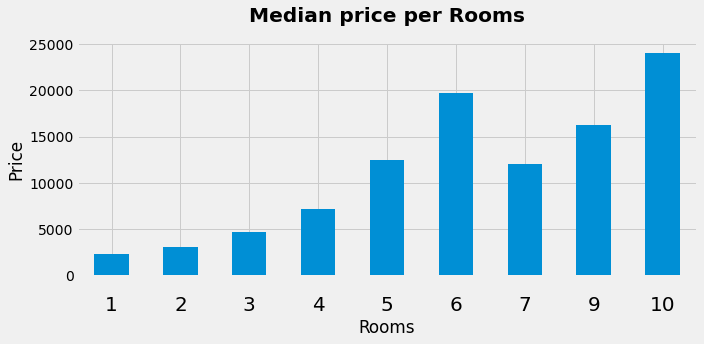

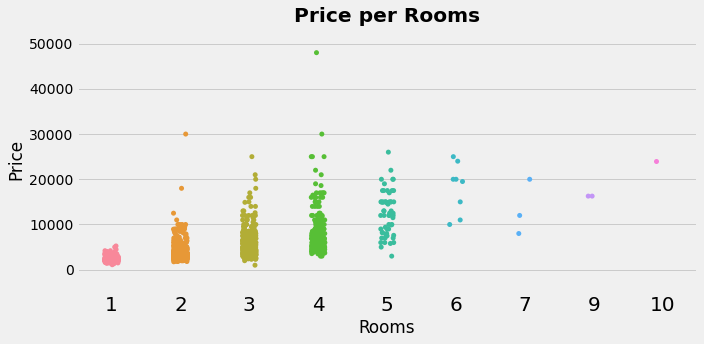

In [40]:
median_plot('Rooms','bar',False,0)

In [41]:
df['Price'].corr(df['Rooms'],method = 'spearman')

0.7187196764974029

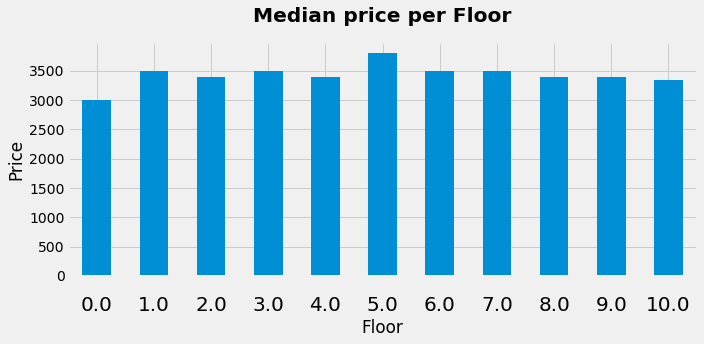

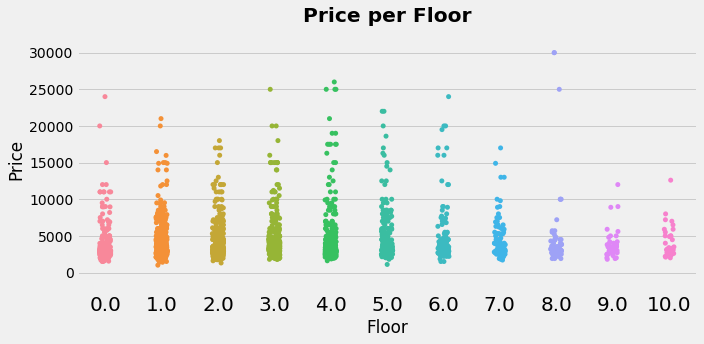

In [42]:
median_plot('Floor','bar',False,0)

In [43]:
df['Price'].corr(df['Floor'],method = 'spearman')

0.06199894330949418

**Spearman's Rho suggests that there is a strong correlation between price and number of rooms, while price and floor have a weak relationship.**

### **Area vs. ordinal variables** <a name="s7"></a>

**Is Area colinear with other variables?**

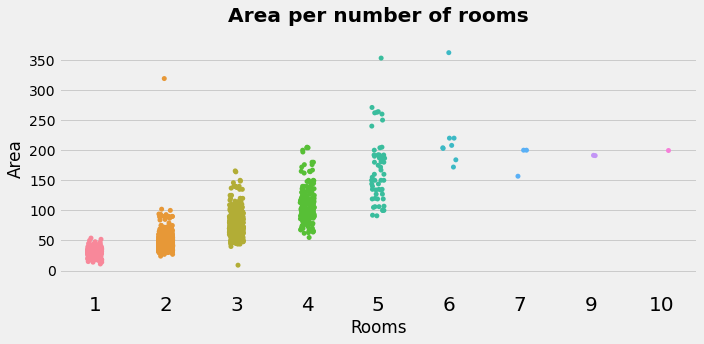

In [44]:
sns.stripplot(x='Rooms', y='Area', data=df)
plt.title(f'Area per number of rooms',fontweight = 'bold')
plt.show()

In [45]:
df['Area'].corr(df['Rooms'],method = 'spearman')

0.8599490668784234

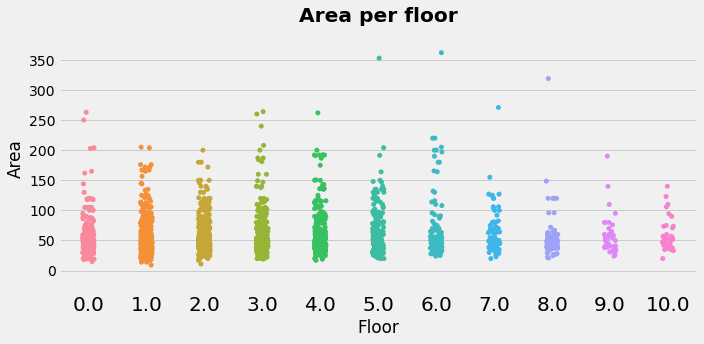

In [46]:
sns.stripplot(x='Floor', y='Area', data=df)
plt.title(f'Area per floor',fontweight = 'bold')
plt.show()

In [47]:
df['Area'].corr(df['Floor'],method = 'spearman')

-0.004050239251729788

**Area and number of rooms are colinear, while floor has a very weak relationship with the area**

### **Price vs. Area** <a name="s7"></a>
**Is there a correlation between those two?**

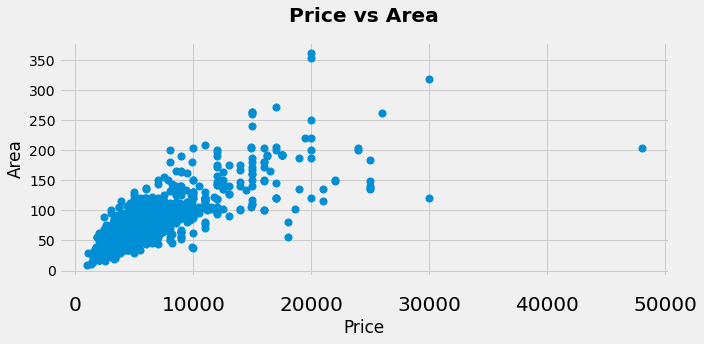

In [48]:
plt.figure()
plt.scatter(x = df['Price'],y = df['Area'],
            linewidths = 1,
            marker ="o",
            s = 50)
plt.title('Price vs Area',fontweight = 'bold')
plt.xlabel('Price') 
plt.ylabel('Area') 
plt.show()

In [49]:
df['Price'].corr(df['Area'])

0.8222683477276845

**Pearson's R this close to 1 suggest a strong correlation between price and area.**

## **Results** <a name="p3"></a>

### What needs to be done to prepare data for regression?
**1. Considering the distribution of numerical variables applying logarithmic transformation and robust scaling seems a good idea**


**2. To deal with rare categories in columns they will be combined into "other" category, except for districts**


**3. Categories with no difference in median will be removed**


**4. Floor also will be dropped in regards to weak correlation**


**5. Columns with more than 15% of missing values will be removed, while others, excluding label variable will be extrapolated**

**6. Rooms column will be dropped due to collinearity with the area**